In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

d:\softwares\Python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import random
import requests

def sample_books(book_urls, Author_name,book_name):
    # Create a list to store the DataFrames
    dataframes = []
    # Iterate over the book URLs and labels
    for url, label, title in zip(book_urls, Author_name,book_name):
        # Download book from Gutenberg
        book = requests.get(url)
        book = book.text
        # Split book into a list of words
        words = book.split()
        # Create a list to store the partitions
        partitions = []
        # Use a for loop to sample 200 partitions of 100 words each
        for i in range(200):
            start_index = random.randint(0, len(words) - 100)
            partition = words[start_index : start_index + 100]
            partitions.append(" ".join(partition))
        # Create a Pandas DataFrame to store the partitions
        data = {'text': partitions,'author': [label]*200,'book':title}
        df = pd.DataFrame(data)
        # Append the DataFrame to the list
        dataframes.append(df)
    # Concatenate the DataFrames into a single DataFrame
    final_df = pd.concat(dataframes)
    #return dataframe
    return final_df


In [3]:
#Example usage
book_urls = ['http://www.gutenberg.org/files/1342/1342-0.txt', 'http://www.gutenberg.org/files/84/84-0.txt','https://www.gutenberg.org/files/2701/2701-0.txt','https://www.gutenberg.org/files/1228/1228-0.txt','https://www.gutenberg.org/files/2600/2600-0.txt']
Author_name = ['Jane Austen', 'Mary Wollstonecraft Shelley','Herman Melville', 'Charles Darwin','Leo Tolstoy']
book_name = ['Pride and prejudice', 'Frankenstein','Moby-Dick','The Origin of Species','War and Peace']
df = sample_books(book_urls, Author_name,book_name)

In [4]:
df.to_csv('text_data.csv',index=False)

In [5]:
# Load the data into a pandas dataframe
df = pd.read_csv("text_data.csv")

In [6]:
# Preprocess the data
df['text'] = df['text'].str.lower() # Convert to lowercase
df['text'] = df['text'].str.replace('[^\w\s]','') # Remove punctuation

<ipython-input-6-310b42ec99db>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','') # Remove punctuation


In [7]:
# Split the data into training, validation, and testing sets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

In [8]:
# Transform the data into bag-of-words representation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer()
train_matrix = vectorizer.fit_transform(train_df['text'])
val_matrix = vectorizer.transform(val_df['text'])
test_matrix = vectorizer.transform(test_df['text'])

## BaseLine Classifiers

In [9]:
# Train a DST classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

model_list = [SVC(),DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(),MultinomialNB()]

Val_accuracies={}
Test_accuracies={}

for Model in model_list:
    Model.fit(train_matrix, train_df['author'])

    # Evaluate the DST using 10-fold cross-validation
    val_predictions = Model.predict(val_matrix)
    val_accuracy = accuracy_score(val_df['author'], val_predictions)
    # print("Validation Accuracy:", val_accuracy)

    # Evaluate the model on the testing set for DST
    test_predictions = Model.predict(test_matrix)
    test_accuracy = accuracy_score(test_df['author'], test_predictions)
    # print("Testing Accuracy:", test_accuracy)

    Val_accuracies[Model]=val_accuracy    
    Test_accuracies[Model]=test_accuracy    

Validation Accuracy: 0.8
Testing Accuracy: 0.83
Validation Accuracy: 0.67
Testing Accuracy: 0.72
Validation Accuracy: 0.86
Testing Accuracy: 0.9
Validation Accuracy: 0.57
Testing Accuracy: 0.66
Validation Accuracy: 0.93
Testing Accuracy: 0.93


d:\softwares\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


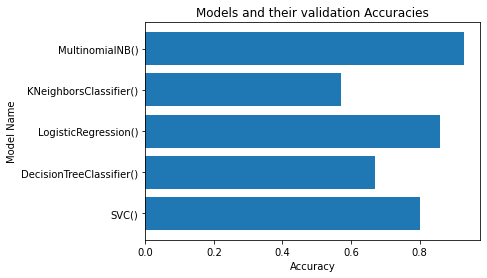

In [27]:
# Convert the model names to strings
model_names = [str(model) for model in Val_accuracies.keys()]
accuracies = Val_accuracies.values()

# Plot the bar graph
plt.barh(model_names, accuracies)
plt.ylabel('Model Name')
plt.xlabel('Accuracy')
plt.title('Models and their validation Accuracies')

# Show the plot
plt.show()

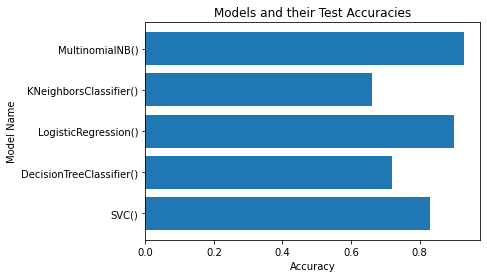

In [28]:
# Convert the model names to strings
model_names = [str(model) for model in Test_accuracies.keys()]
accuracies = Test_accuracies.values()

# Plot the bar graph
plt.barh(model_names, accuracies)
plt.ylabel('Model Name')
plt.xlabel('Accuracy')
plt.title('Models and their Test Accuracies')

# Show the plot
plt.show()